In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
classic_pools_mevs_df = pd.read_csv('classic_pools_mev_profits_df.csv')
nft_pools_mevs_df = pd.read_csv('nft_pools_mev_profits_df.csv')
meme_pools_mevs_df = pd.read_csv('meme_pools_mev_profits_df.csv')
sto_pools_mevs_df = pd.read_csv('sto_pools_mev_profits_df.csv')

In [4]:
mevs_list = [classic_pools_mevs_df, nft_pools_mevs_df, 
             meme_pools_mevs_df, sto_pools_mevs_df]
mevs_df = pd.concat(mevs_list)

In [5]:
mevs_df.reset_index(inplace=True)

In [6]:
mevs_df.drop(columns=['level_0', 'Unnamed: 0', 'index'], inplace=True)
mevs_df['timestamp'] = pd.to_datetime(mevs_df['timestamp'])

In [7]:
mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35205 entries, 0 to 35204
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           35205 non-null  datetime64[ns]
 1   sender              35205 non-null  object        
 2   txd                 35205 non-null  object        
 3   block               35205 non-null  float64       
 4   block_position      35205 non-null  float64       
 5   bruto_total_profit  35205 non-null  float64       
 6   tx_fee              35205 non-null  float64       
 7   gas_costs_usd       35205 non-null  float64       
 8   netto_profit        35205 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.4+ MB


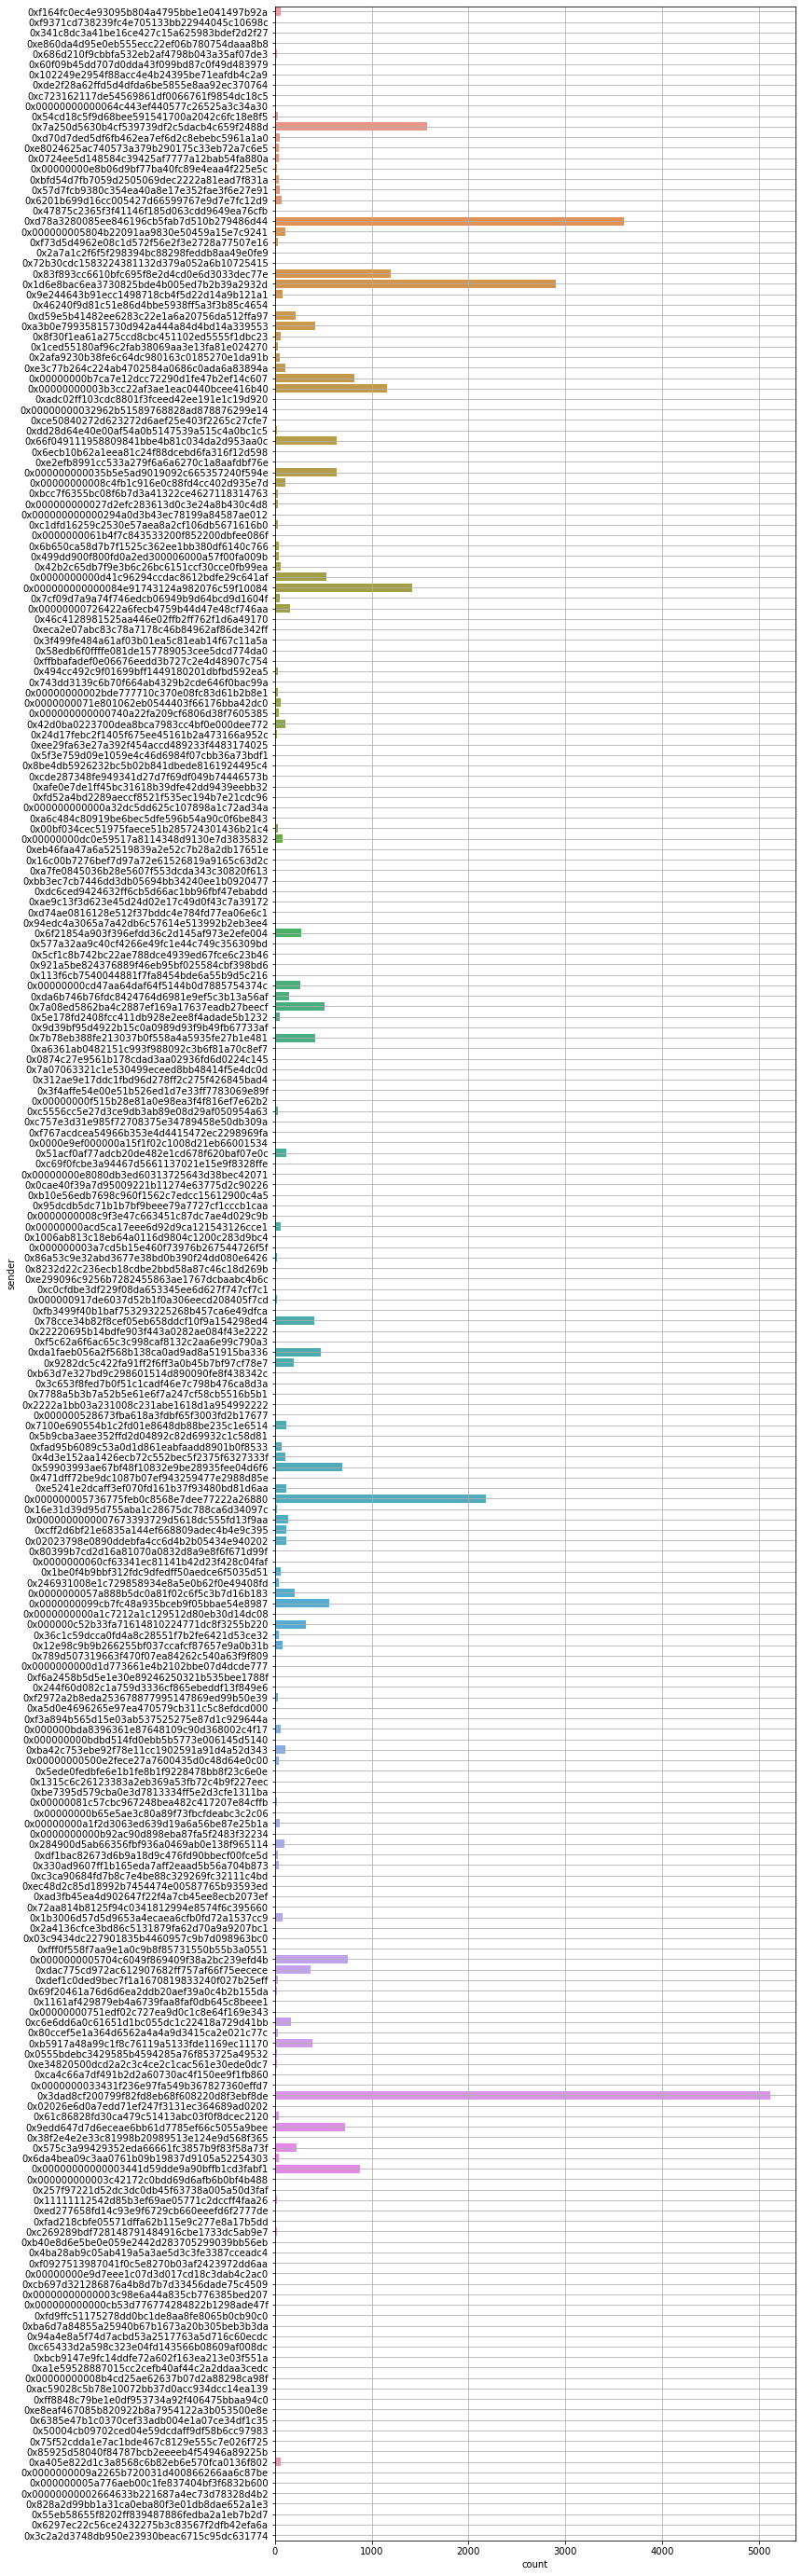

In [8]:
plt.figure(figsize=(10, 50))
sns.countplot(data=mevs_df, y='sender')
plt.grid(True)
plt.show()

In [26]:
print(mevs_df[mevs_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de']['timestamp'].min())
print(mevs_df[mevs_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de']['timestamp'].max())
mevs_df[mevs_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de'].sort_values(by=['timestamp'])

2021-04-12 12:35:43
2021-08-13 22:51:17


,timestamp,sender,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit
8929,2021-04-12 12:35:43,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x5e9a4a96ad66b0c034e70f1eb37f23bfa4e39d31f289...,12225281.0,193.0,91.943910,8.470000e-08,0.000181,91.943728
8930,2021-04-12 12:35:43,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0xb57e74f2e7d9d7622f3757c4f6f94a524fc5e4c588d4...,12225281.0,188.0,91.943910,8.470000e-08,0.000181,91.943728
8931,2021-04-12 12:38:38,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x354d2e7f38621f87bdd651314674a26c4b98bf2ccd68...,12225294.0,47.0,232.261774,1.089000e-07,0.000233,232.261541
8932,2021-04-12 12:38:38,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x94ea57c56dcab00730099183bc69e95eea05d0079aaa...,12225294.0,45.0,232.261774,1.089000e-07,0.000233,232.261541
8937,2021-04-12 13:28:18,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x57959524248ad85a8e5482cdb6d246d1cb42eab7d12c...,12225499.0,10.0,162.113644,1.350000e-07,0.000289,162.113354
...,...,...,...,...,...,...,...,...,...
31844,2021-08-01 11:49:25,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x001c9cc92967f35b775037c1d09201dbdb3191d10160...,12939447.0,70.0,42.805645,2.100000e-08,0.000054,42.805591
31881,2021-08-02 14:25:09,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x970a42e1ecc71cf244df598788512c81252f04ba5658...,12946447.0,16.0,64.976954,6.000000e-08,0.000157,64.976797
31882,2021-08-02 14:25:09,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x951b8fb52b0ae9dd41ed0e6bba95e6104a0e489892f7...,12946447.0,13.0,64.976954,6.000000e-08,0.000157,64.976797
32099,2021-08-13 22:51:17,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x04cd2ae15e5360ee43b1f2e2e119cfea6b5f9186292a...,13019646.0,54.0,80.267186,6.160000e-08,0.000205,80.266981


In [25]:
print(mevs_df[mevs_df['sender'] == '0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d']['timestamp'].min())
print(mevs_df[mevs_df['sender'] == '0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d']['timestamp'].max())
mevs_df[mevs_df['sender'] == '0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d'].sort_values(by=['timestamp'])

2020-12-08 00:09:13
2022-01-09 05:33:21


,timestamp,sender,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit
1283,2020-12-08 00:09:13,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xb42075909767db112db40d7cd272465c48b4f9ee3817...,11408804.0,15.0,184.512427,4.482225e-07,0.000248,184.512179
1282,2020-12-08 00:09:13,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xd3d9f57b0df2e66e2a65d9209991dcc6620bf84b80da...,11408804.0,141.0,184.512427,4.400000e-08,0.000024,184.512403
1483,2021-01-21 08:24:41,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x8a33b91645174fb1e9e492424aeebd0c025558050886...,11697674.0,15.0,1975.246627,6.320954e-07,0.000706,1975.245921
1490,2021-01-21 08:24:41,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x8a33b91645174fb1e9e492424aeebd0c025558050886...,11697674.0,15.0,1975.246627,6.320954e-07,0.000706,1975.245921
1491,2021-01-21 08:24:41,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x8a33b91645174fb1e9e492424aeebd0c025558050886...,11697674.0,15.0,3863.761270,6.320954e-07,0.000706,3863.760564
...,...,...,...,...,...,...,...,...,...
770,2021-12-10 20:36:51,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xc64a9baa4a7a19c8f85350381f20650e182cccd07101...,13779625.0,3.0,87.927991,9.030392e-08,0.000352,87.927639
791,2022-01-03 07:35:51,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xbdf3d333d1134557f9854311d09db52448e63f0740f9...,13931208.0,5.0,99.375962,2.350266e-07,0.000884,99.375077
790,2022-01-03 07:35:51,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xd35c8b29748a739f43b24c21228d5fd19ca0f956268f...,13931208.0,3.0,99.375962,8.899997e-08,0.000335,99.375627
808,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x8d86190d1027eba21b077940f1c414e3ca06ace37839...,13969481.0,4.0,59.980496,1.172866e-07,0.000368,59.980128


In [24]:
print(mevs_df[mevs_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44']['timestamp'].min())
print(mevs_df[mevs_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44']['timestamp'].max())
mevs_df[mevs_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44'].sort_values(by=['timestamp'])

2021-04-05 04:07:41
2021-05-25 11:26:13


,timestamp,sender,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit
2275,2021-04-05 04:07:41,0xd78a3280085ee846196cb5fab7d510b279486d44,0x80fd2cad37d62913e8a8b2bb05bd79a1f35212dd188d...,12177438.0,0.0,212.079254,1.000000e-09,0.000002,212.079252
2274,2021-04-05 04:07:41,0xd78a3280085ee846196cb5fab7d510b279486d44,0xc1f22d914d3f8bb4989c17c2c0c4741bcd6e01717973...,12177438.0,3.0,212.079254,1.000000e-09,0.000002,212.079252
2281,2021-04-05 11:42:32,0xd78a3280085ee846196cb5fab7d510b279486d44,0xa0f7a60fcef19b59c48936e823476144d7d9e9114255...,12179463.0,5.0,107.338156,1.000000e-09,0.000002,107.338154
2280,2021-04-05 11:42:32,0xd78a3280085ee846196cb5fab7d510b279486d44,0x6f8e138a17c9c4915325eedec27d92bd10421352a735...,12179463.0,3.0,107.338156,1.000000e-09,0.000002,107.338154
2288,2021-04-05 19:15:55,0xd78a3280085ee846196cb5fab7d510b279486d44,0x8fc467dd2d04f89e531a344ba4fae95539e63c91f3fb...,12181491.0,2.0,491.377273,1.000000e-09,0.000002,491.377271
...,...,...,...,...,...,...,...,...,...
28258,2021-05-25 00:27:07,0xd78a3280085ee846196cb5fab7d510b279486d44,0xa1ff683a52639ddc486bdc7fdaf498879542bbaae010...,12500304.0,0.0,390.626441,1.000000e-09,0.000003,390.626439
28259,2021-05-25 00:31:09,0xd78a3280085ee846196cb5fab7d510b279486d44,0x549999205478385782a5e047730194a88310e512d4a2...,12500319.0,0.0,574.944666,1.000000e-09,0.000003,574.944663
28260,2021-05-25 00:31:09,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf3c82ecf7d4e9ccde7c0660d9f1239eb071f7243459b...,12500319.0,2.0,574.944666,1.000000e-09,0.000003,574.944663
28283,2021-05-25 11:26:13,0xd78a3280085ee846196cb5fab7d510b279486d44,0x03b32680e09490f3fc0d373ff4cee934a31c0d1bd43a...,12503196.0,2.0,467.278279,1.000000e-09,0.000003,467.278276


In [27]:
print(mevs_df[mevs_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e']['timestamp'].min())
print(mevs_df[mevs_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e']['timestamp'].max())
mevs_df[mevs_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e'].sort_values(by=['timestamp'])

2021-04-14 23:21:58
2021-08-10 16:12:22


,timestamp,sender,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit
242,2021-04-14 23:21:58,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0xe3d5e652b70d6ea668d3fa954f8e0798b80b60449d5c...,12241142.0,0.0,626.768023,1.000000e-09,0.000002,626.768021
243,2021-04-14 23:21:58,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x70e3f6afb08325247567717b8fe5d284909386983133...,12241142.0,2.0,626.768023,1.000000e-09,0.000002,626.768021
9238,2021-04-15 03:44:45,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x8549d4352fb96006f199b9ad819f9a56da9d4e2b8305...,12242305.0,2.0,164.000261,1.560000e-07,0.000392,163.999869
9237,2021-04-15 03:44:45,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x55c93ed2405a426be55c40400522da323da9335ec20d...,12242305.0,0.0,164.000261,1.560000e-07,0.000392,163.999869
9242,2021-04-15 04:33:53,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x6f521b2f9d481e5dc95cd1bf270914d4274eadb45dfa...,12242546.0,2.0,101.537103,1.560000e-07,0.000392,101.536711
...,...,...,...,...,...,...,...,...,...
31976,2021-08-07 03:22:17,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0xf615fd6e2dba6b25a19df57fd6ea435ffb6829d4a1d5...,12975448.0,2.0,599.877548,3.617511e-08,0.000114,599.877434
31991,2021-08-07 20:33:26,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x5df47061a2bc71e9cab774c7e99fa89bf812a66ed037...,12980139.0,7.0,65.225389,3.634531e-08,0.000115,65.225274
31992,2021-08-07 20:33:26,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x38f6156442f93c7cf5951284037f92ec13c16f91a22a...,12980139.0,5.0,65.225389,3.634531e-08,0.000115,65.225274
506,2021-08-10 16:12:22,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,0x3b68007de77704f897af0003a63117ce646c902ca2f4...,12998450.0,2.0,1756.751488,6.017563e-08,0.000189,1756.751299


In [28]:
print(mevs_df[mevs_df['sender'] == '0x000000000000084e91743124a982076c59f10084']['timestamp'].min())
print(mevs_df[mevs_df['sender'] == '0x000000000000084e91743124a982076c59f10084']['timestamp'].max())
mevs_df[mevs_df['sender'] == '0x000000000000084e91743124a982076c59f10084'].sort_values(by=['timestamp'])

2020-10-02 22:18:17
2021-11-06 14:51:22


,timestamp,sender,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit
4784,2020-10-02 22:18:17,0x000000000000084e91743124a982076c59f10084,0xc40ee44ae303a5c2a49b61127031cf1773822bcfbd69...,10979228.0,0.0,233.666094,1.104715e-05,0.003810,233.662284
4785,2020-10-02 22:18:17,0x000000000000084e91743124a982076c59f10084,0x4a26ce7c74d22d9365ec8ad0f3402ea91f7550e228a0...,10979228.0,25.0,233.666094,1.000000e-07,0.000034,233.666059
1050,2020-10-29 15:42:52,0x000000000000084e91743124a982076c59f10084,0x12e88242e544aa55f5f23967c1030dacacf2bd143a4b...,11152536.0,0.0,207.797912,1.265479e-06,0.000489,207.797423
1051,2020-10-29 15:42:52,0x000000000000084e91743124a982076c59f10084,0x752c5259216eff9fa432a94d234ef34199b471bf6a69...,11152536.0,15.0,207.797912,1.550000e-07,0.000060,207.797852
1068,2020-11-09 01:39:50,0x000000000000084e91743124a982076c59f10084,0x31cfe6313210da76986f8f88abfa9dbd63a37be4054f...,11220392.0,1.0,12.631663,4.400042e-08,0.000020,12.631643
...,...,...,...,...,...,...,...,...,...
33824,2021-10-26 20:45:17,0x000000000000084e91743124a982076c59f10084,0x5ed300b382912407c91af9bfb11a2ce4e633693d2d49...,13495173.0,264.0,2207.009525,2.114868e-07,0.000875,2207.008649
34247,2021-10-30 10:15:55,0x000000000000084e91743124a982076c59f10084,0xb186cde0d0a4f296f6531431edf2447250e5dbb62865...,13517891.0,110.0,4104.308345,1.075793e-07,0.000464,4104.307881
34248,2021-10-30 10:15:55,0x000000000000084e91743124a982076c59f10084,0xfe8d58862826e9745953513b9b7b6c44434d371c9d18...,13517891.0,62.0,4104.308345,1.230482e-07,0.000531,4104.307814
34733,2021-11-06 14:51:22,0x000000000000084e91743124a982076c59f10084,0xfb6e5b3e8236000dd3222515287d25a01f4d3dc0b8e3...,13563591.0,185.0,1979.080762,2.315544e-07,0.001045,1979.079717


In [14]:
grouped_mevs_df = mevs_df.groupby(by='sender').sum()
grouped_mevs_df.drop(columns=['block', 'block_position'], inplace=True)
grouped_mevs_df.reset_index(inplace=True)
grouped_mevs_df.sort_values(by=['netto_profit'])

,sender,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit
65,0x11111112542d85b3ef69ae05771c2dccff4faa26,0.000000e+00,9.696000e-06,0.035955,-3.595502e-02
230,0xf6a2458b5d5e1e30e89246250321b535bee1788f,5.208760e+00,3.000000e-07,0.000772,5.207987e+00
172,0xae9c13f3d623e45d24d02e17c49d0f43c7a39172,1.580504e+01,6.700000e-08,0.000038,1.580500e+01
170,0xad3fb45ea4d902647f22f4a7cb45ee8ecb2073ef,1.643371e+01,6.100000e-08,0.000024,1.643369e+01
240,0xffbbafadef0e06676eedd3b727c2e4d48907c754,1.693041e+01,1.651444e-06,0.000620,1.692979e+01
...,...,...,...,...,...
2,0x000000000000084e91743124a982076c59f10084,2.755521e+06,1.269380e-03,2.759284,2.755518e+06
149,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,3.105626e+06,9.523271e-05,0.296556,3.105625e+06
203,0xd78a3280085ee846196cb5fab7d510b279486d44,3.812186e+06,3.602000e-06,0.010453,3.812186e+06
75,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,4.392811e+06,2.643220e-03,9.750160,4.392801e+06


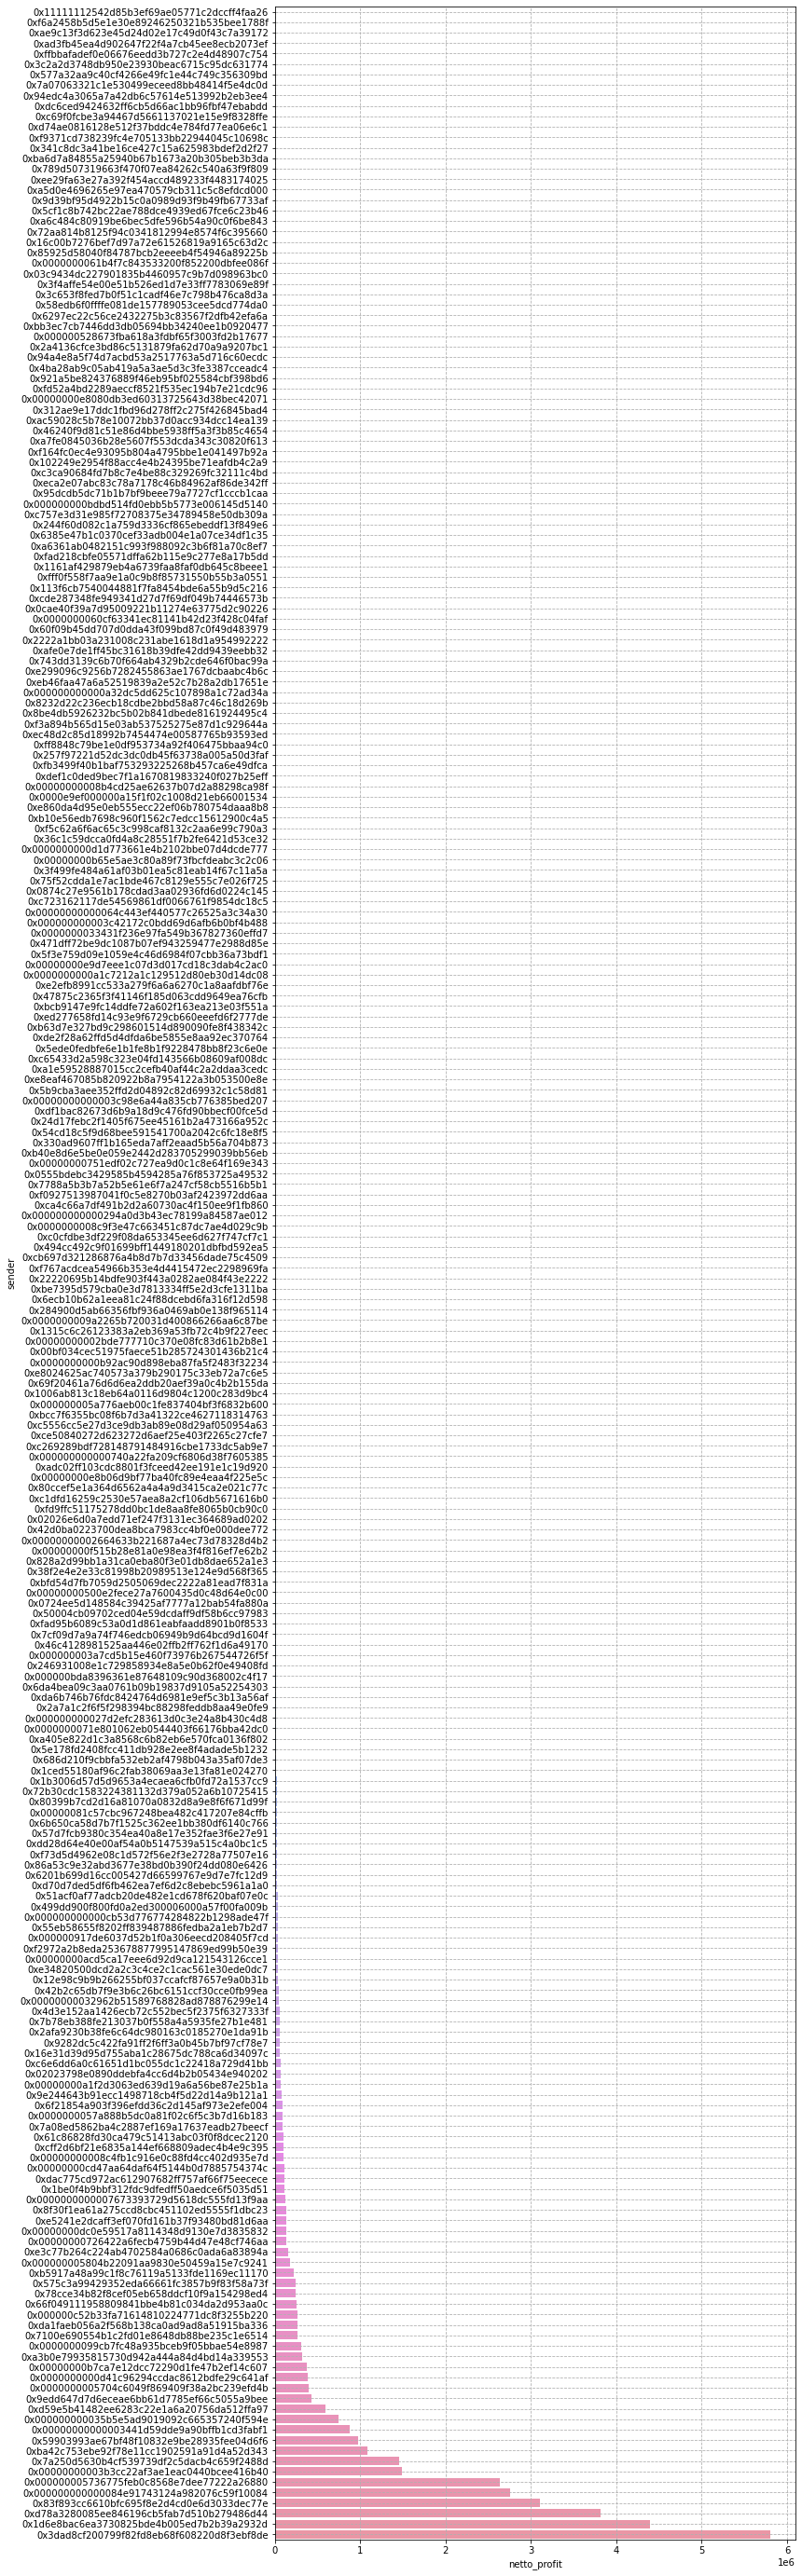

In [31]:
plt.figure(figsize=(10, 50))
sns.barplot(data=grouped_mevs_df, y='sender', x='netto_profit', 
            order=grouped_mevs_df.sort_values('netto_profit').sender)
plt.grid(True, linestyle='--')
plt.show()